# VISUALIZACIÓN

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib.gridspec import GridSpec

### Con nuestros dos DataFrames limpios, nos planteamos las dudas que nuestro cliente necesita resolver.

In [11]:
df_social = pd.read_csv('../Datos/df-social-limpio.csv', index_col=0)
df_social.head()

,genero,edad,pais,nivel de estudios,puesto de trabajo,sector,tamaño de la compañia,continente,rama
0,Man,50-54,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,"1000-9,999 employees",Asia,other
1,Man,22-24,Pakistan,Master’s degree,Software Engineer,Academics/Education,"1000-9,999 employees",Asia,developer
2,Man,45-49,Mexico,Doctoral degree,Research Scientist,Academics/Education,"1000-9,999 employees",América del Sur,data
6,Man,30-34,India,Bachelor’s degree,Data Scientist,Computers/Technology,"10,000 or more employees",Asia,data
12,Man,45-49,Nigeria,Master’s degree,Program/Project Manager,Shipping/Transportation,"1000-9,999 employees",África,other


In [12]:
df_tecnico = pd.read_csv('../Datos/df-tecnico-limpio.csv', index_col=0)
df_tecnico.head()

,edad,pais,nivel de estudios,sector,años de experiencia,años de experiencia en ML,continente,Python,C++,SQL,MATLAB,Other,C,Java,Javascript,R,Swift,Bash,Julia
0,25-29,Poland,Master’s degree,Computers/Technology,3-5 years,Under 1 year,Europa,N,Y,N,N,N,N,N,N,N,N,N,N
1,30-34,Viet Nam,Master’s degree,Academics/Education,1-3 years,1-2 years,Asia,Y,N,N,N,N,N,N,N,N,N,N,N
2,22-24,Morocco,Master’s degree,Computers/Technology,1-3 years,Under 1 year,África,N,N,N,N,Y,N,N,N,N,N,N,N
3,18-21,Bangladesh,Bachelor’s degree,Non-profit/Service,under 1 years,Under 1 year,Asia,Y,N,N,N,N,N,N,N,N,N,N,N
4,18-21,India,Bachelor’s degree,Academics/Education,1-3 years,Under 1 year,Asia,N,Y,N,N,N,N,N,N,N,N,N,N


¿Qué relación hay entre el sector, el tamaño de la compañía y el género?

¿Qué relación hay entre la edad y el puesto de trabajo, sólo en mujeres?

Podríamos añadir el tema del sector.

Querríamos saber el rango de edad de mujeres en el sector tech para ver por dónde tendrían que enfocarse los cursos.

(ej. Cursos para mujeres +40 que quieran cambiar de sector)

Preguntas Técnico

¿Qué relación hay los años de experiencia y el tiempo que llevan trabajando en ML?

¿Qué relación hay entre el continente y el lenguaje que utilizan para trabajar?

¿Qué relación hay entre la edad, los años de experiencia y el lenguaje que mas usan?

Querríamos saber cuántas mujeres en ML hay en cada continente, enfocado a los cursos.

¿Qué diferencia de género hay entre continentes, en posiciones de Data y de Programación?

In [66]:
df_continente = df_social[df_social["rama"].isin(["data","developer"])]

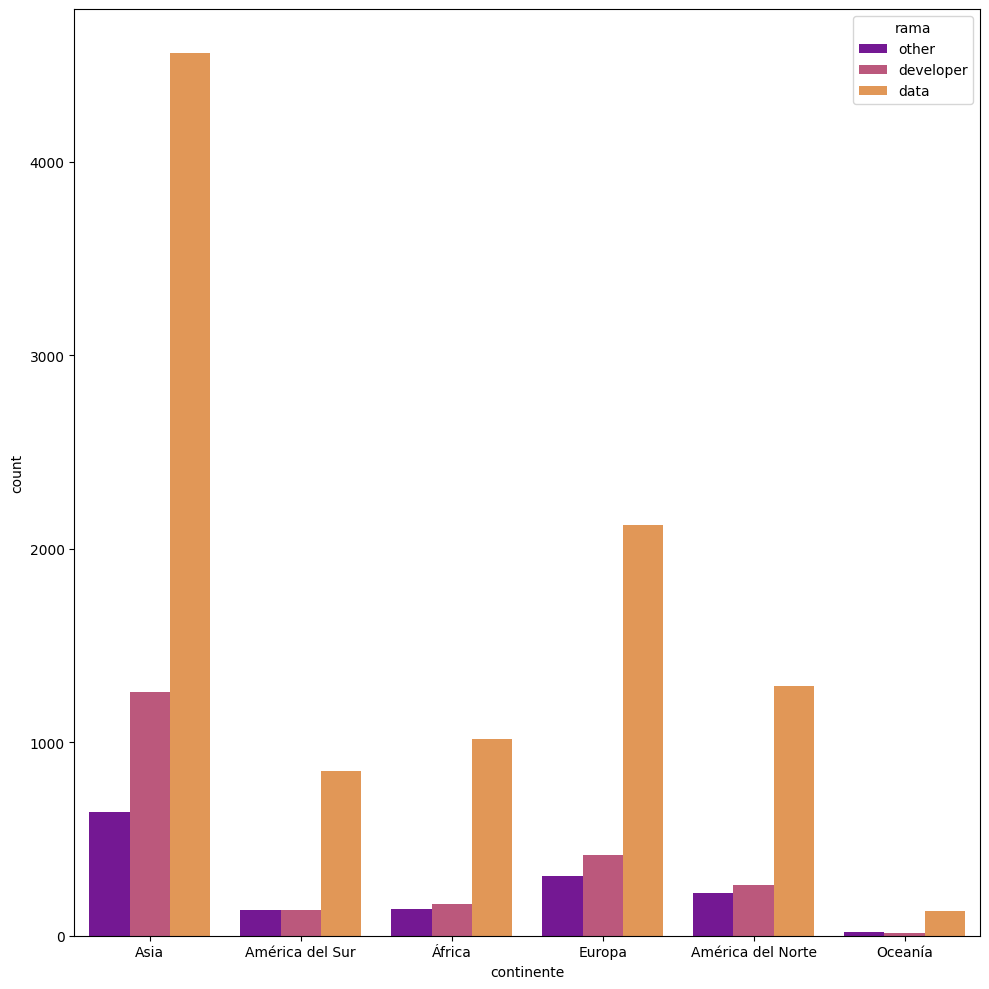

In [72]:
plt.figure(figsize=(10,10))

fig = sns.countplot(x = df_social["continente"],hue = df_social["rama"],  palette = 'plasma')
plt.tight_layout()

plt.show()

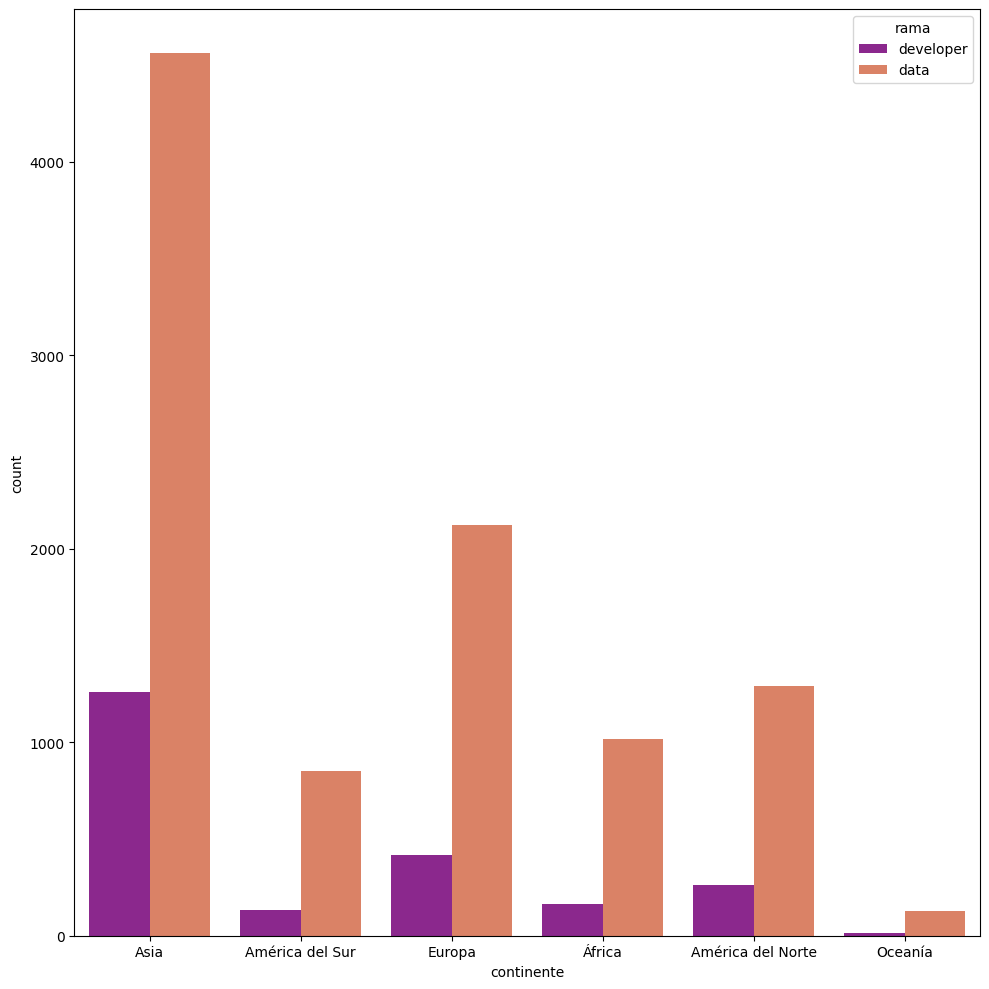

In [67]:
plt.figure(figsize=(10,10))

fig = sns.countplot(x = df_continente["continente"], hue = df_continente["rama"], palette = 'plasma')
plt.tight_layout()

plt.show()

In [33]:
df_asia = df_social[df_social["continente"].isin(["Asia"])]

In [61]:
df_asia2 = df_social[df_social["pais"].isin(["India", "Japan", "China", "Pakistan"])]

In [54]:
import sidetable

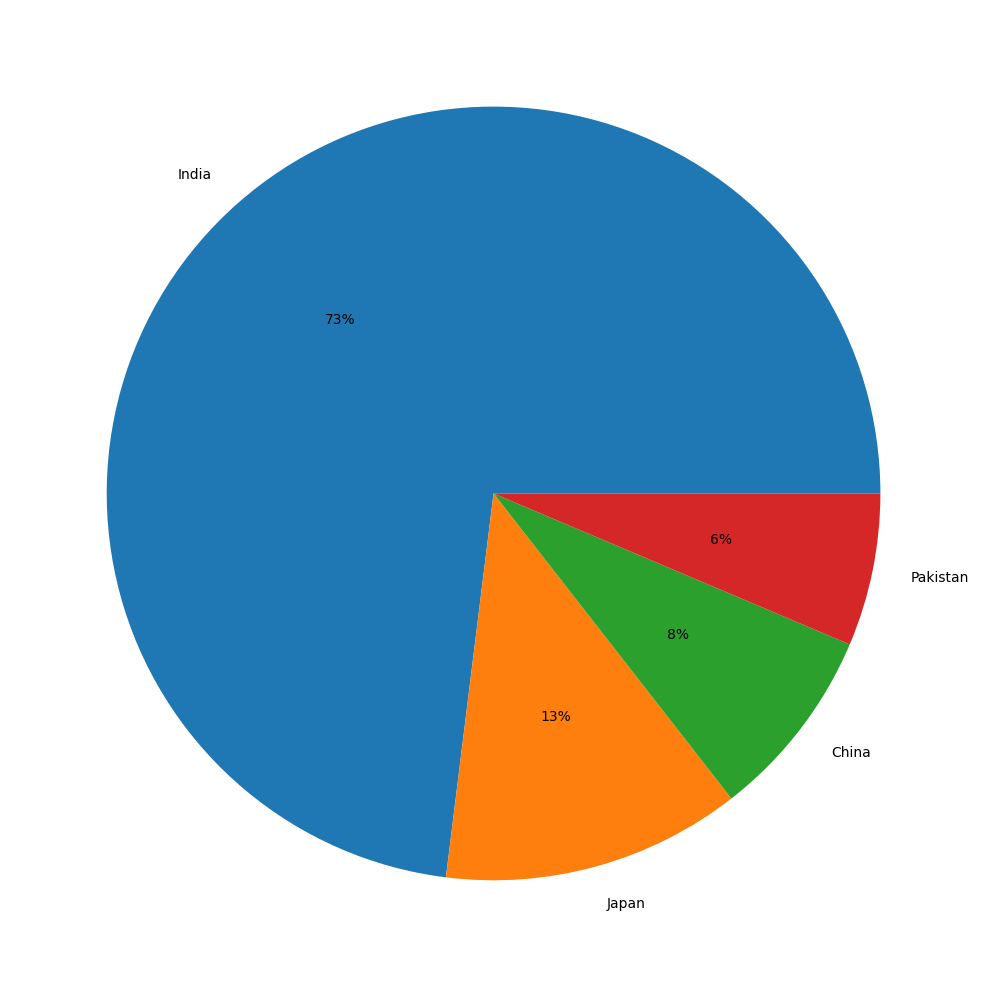

In [62]:
plt.figure(figsize=(10,10))

plt.pie(labels = df_asia2["pais"].value_counts().keys(), x= df_asia2["pais"].value_counts().values, autopct="%1.0f%%")
plt.tight_layout()

plt.show()

¿Qué relación hay entre el nivel de estudios y el continente dónde residen?

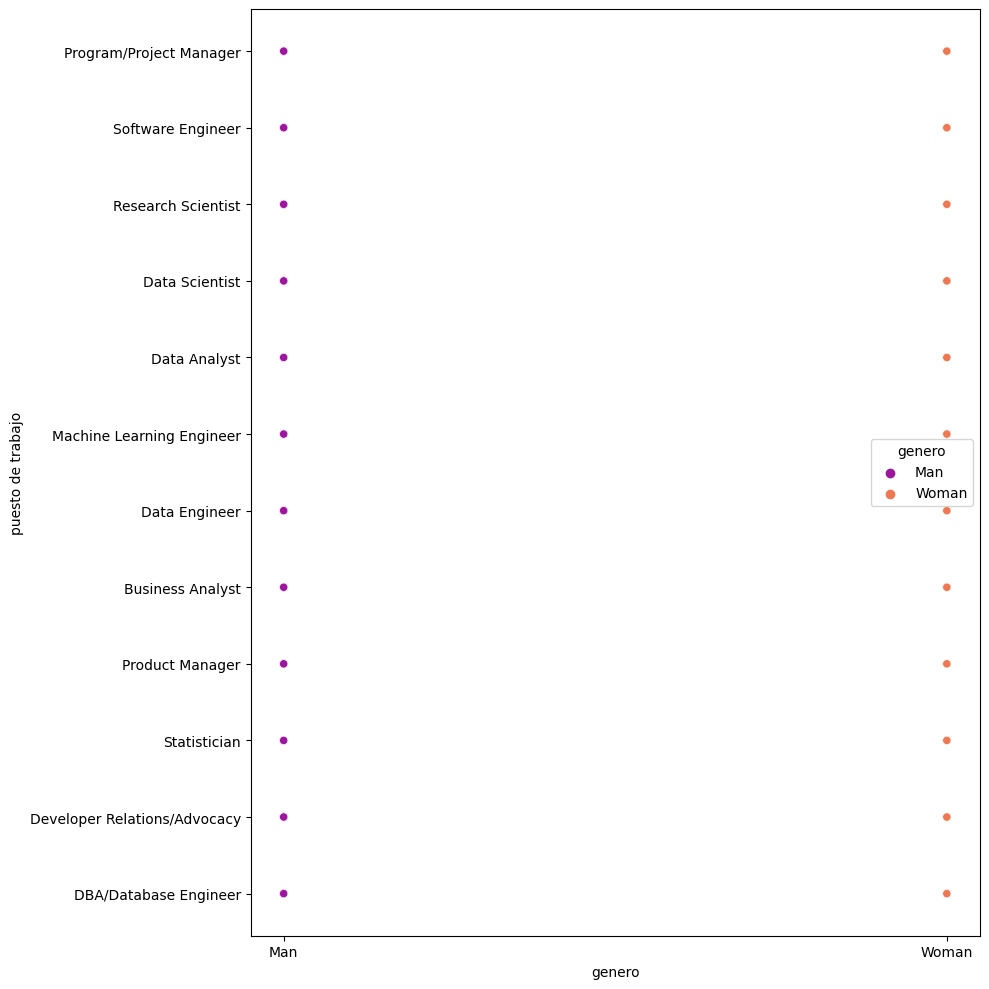

In [84]:
plt.figure(figsize=(10,10))

fig = sns.scatterplot(x = df_social["genero"], y= df_social["puesto de trabajo"],  hue = df_social["genero"], palette = 'plasma')
plt.tight_layout()

plt.show()

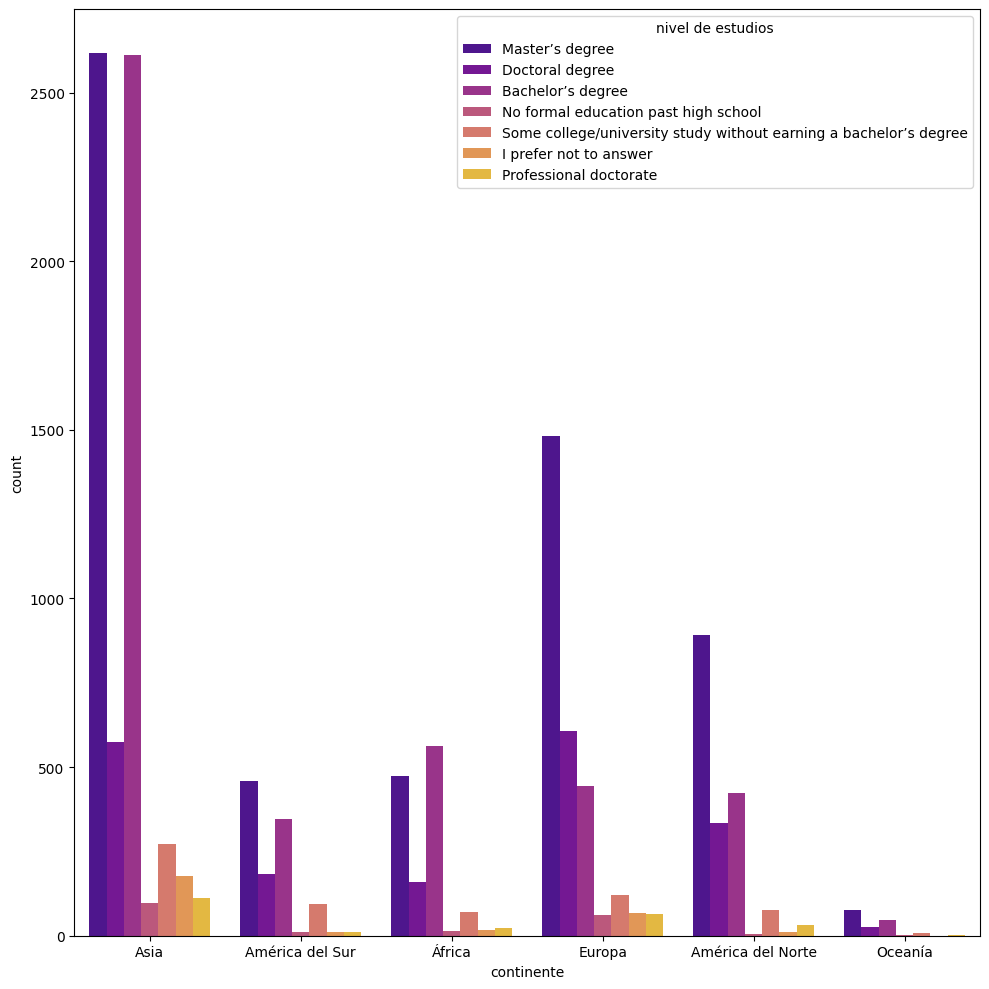

In [81]:
plt.figure(figsize=(10,10))

fig = sns.countplot(x = df_social["continente"], hue = df_social["nivel de estudios"], palette = 'plasma')
plt.tight_layout()

plt.show()

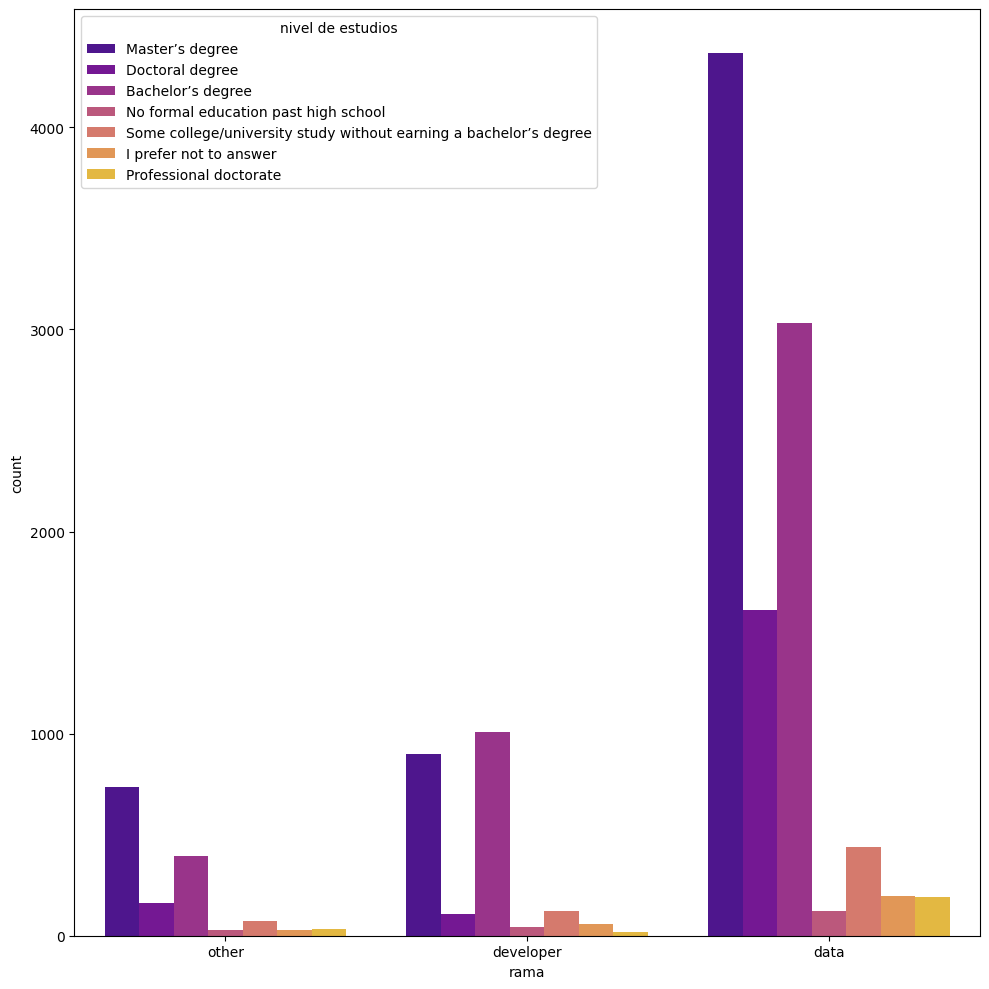

In [82]:
plt.figure(figsize=(10,10))

fig = sns.countplot(x = df_social["rama"], hue = df_social["nivel de estudios"], palette = 'plasma')
plt.tight_layout()

plt.show()

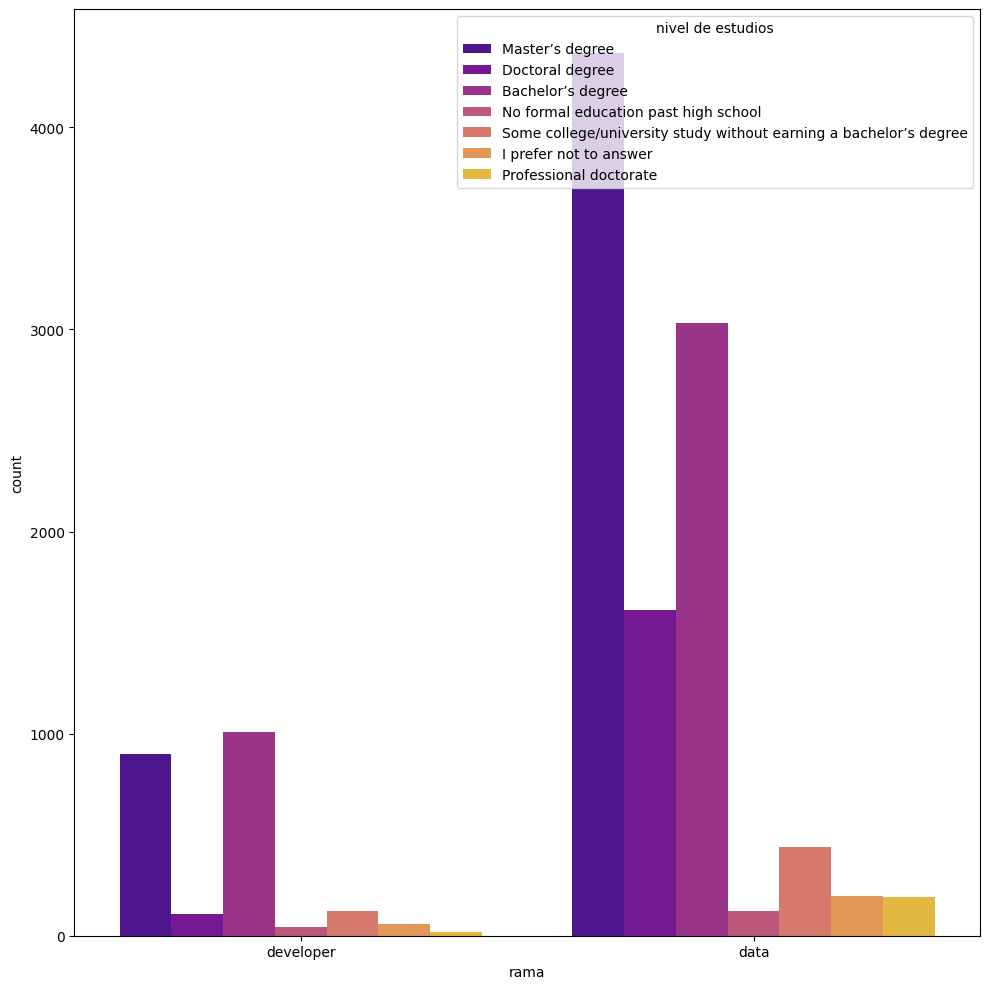

In [83]:
plt.figure(figsize=(10,10))

fig = sns.countplot(x = df_continente["rama"], hue = df_continente["nivel de estudios"], palette = 'plasma')
plt.tight_layout()

plt.show()

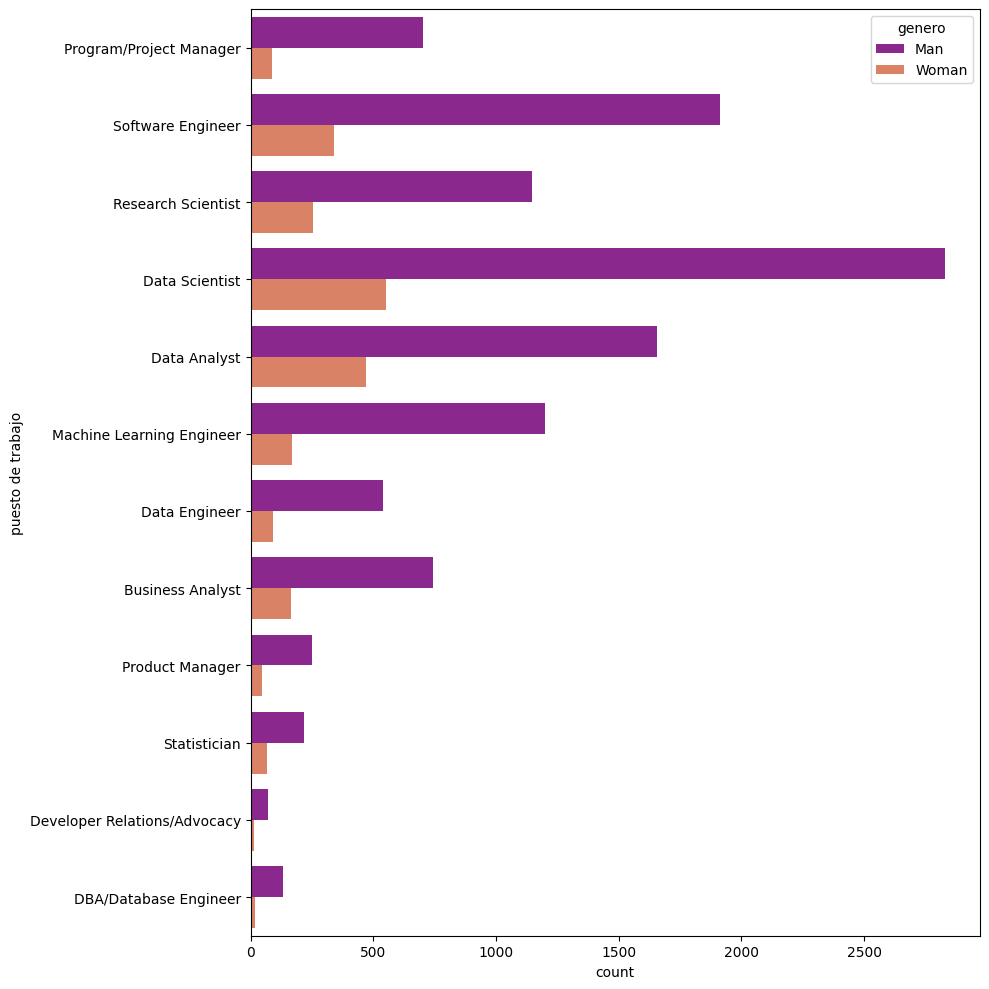

In [19]:
plt.figure(figsize=(10,10))

fig = sns.countplot(y = df_social["puesto de trabajo"], hue = df_social["genero"], palette = 'plasma')
plt.tight_layout()

plt.show()

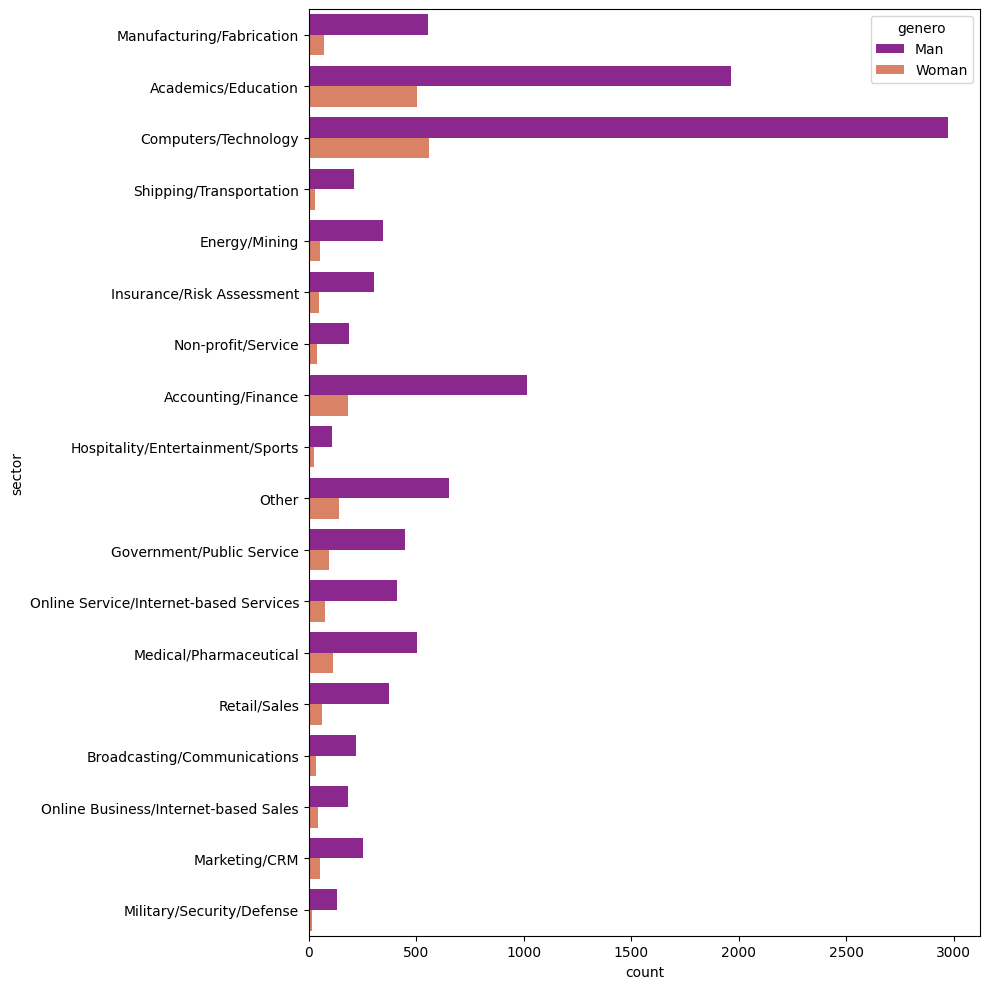

In [20]:
plt.figure(figsize=(10,10))

fig = sns.countplot(y = df_social["sector"], hue = df_social["genero"], palette = 'plasma')
plt.tight_layout()

plt.show()

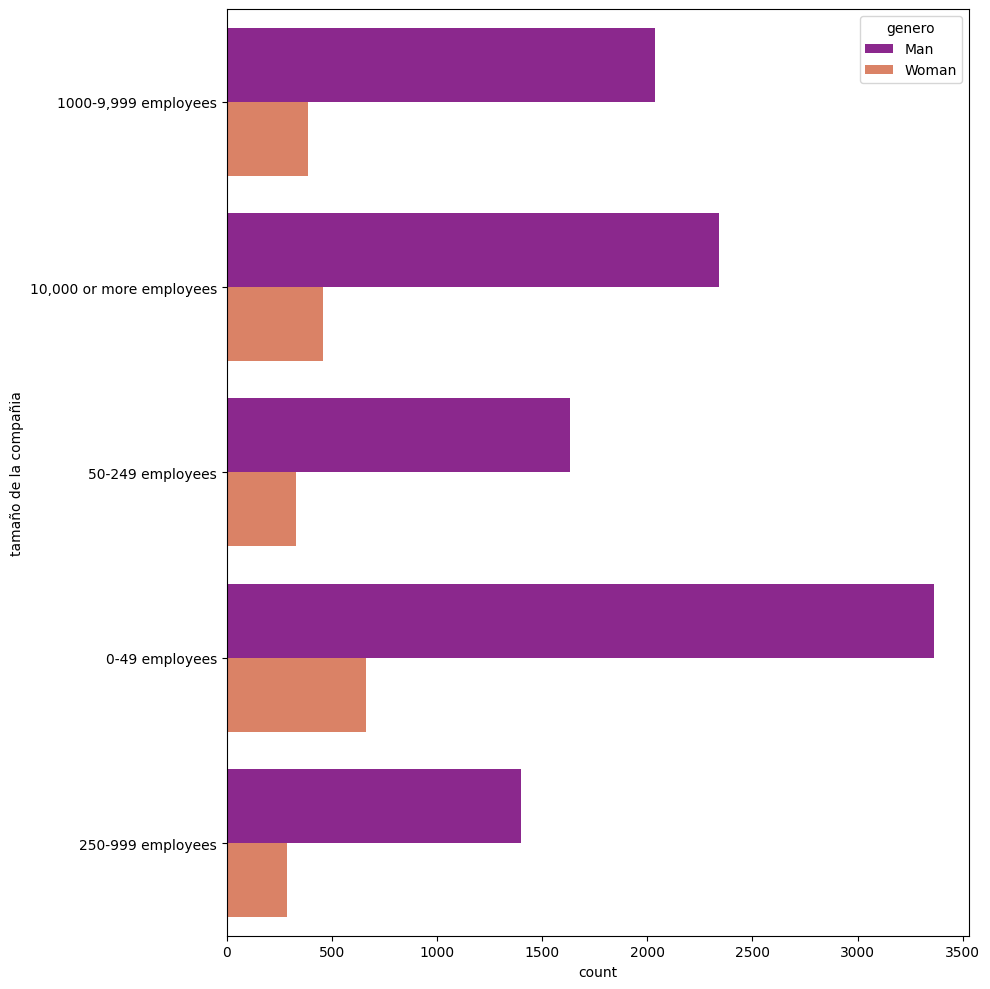

In [21]:
plt.figure(figsize=(10,10))

fig = sns.countplot(y = df_social["tamaño de la compañia"], hue = df_social["genero"], palette = 'plasma')
plt.tight_layout()

plt.show()